In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from sklearn.datasets import fetch_openml
car_data=fetch_openml(name='car',version=2,parser='auto')
type(car_data)

sklearn.utils._bunch.Bunch

In [12]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [13]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [14]:
car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [15]:
type(car_data)

pandas.core.frame.DataFrame

In [17]:
from sklearn.model_selection import train_test_split
train_data,test_data=train_test_split(car_data,test_size=0.3,random_state=20)
print('training data ={}\ntesting data ={}'.format(len(train_data),len(test_data)))

training data =1209
testing data =519


In [19]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1209,1209,1209,1209,1209,1209,1209
unique,4,4,4,3,3,3,2
top,med,high,5more,more,big,med,P
freq,327,311,319,418,411,406,849


In [20]:
train_data.isnull()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
1005,False,False,False,False,False,False,False
551,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
409,False,False,False,False,False,False,False
1682,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
924,False,False,False,False,False,False,False
1247,False,False,False,False,False,False,False
271,False,False,False,False,False,False,False
474,False,False,False,False,False,False,False


In [21]:
train_data['buying'].value_counts()

buying
med      327
high     307
vhigh    291
low      284
Name: count, dtype: int64

In [22]:
train_data['maint'].value_counts()

maint
high     311
med      311
vhigh    294
low      293
Name: count, dtype: int64

In [23]:
train_data['doors'].value_counts()

doors
5more    319
2        312
4        296
3        282
Name: count, dtype: int64

In [24]:
train_data['persons'].value_counts()

persons
more    418
2       407
4       384
Name: count, dtype: int64

In [25]:
train_data['lug_boot'].value_counts()

lug_boot
big      411
med      405
small    393
Name: count, dtype: int64

<Axes: xlabel='buying', ylabel='count'>

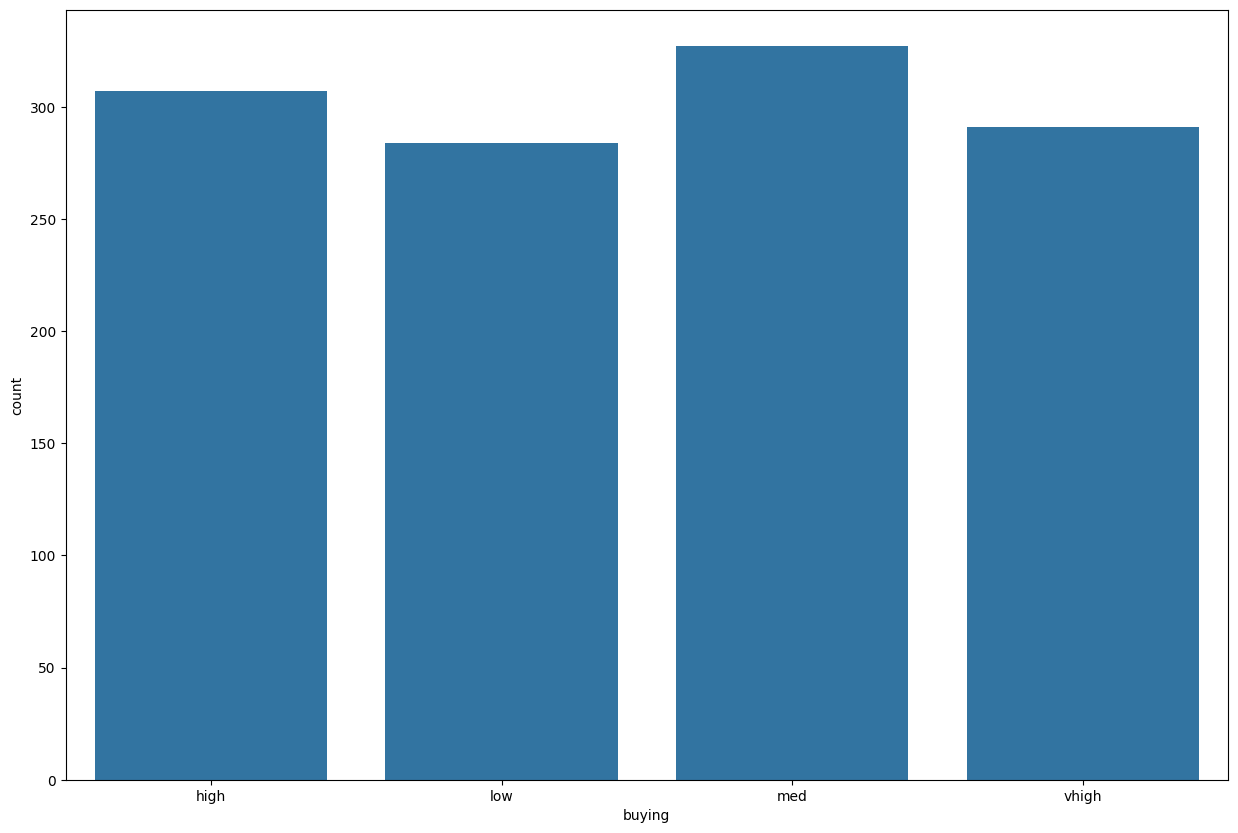

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='buying')

<Axes: xlabel='doors', ylabel='count'>

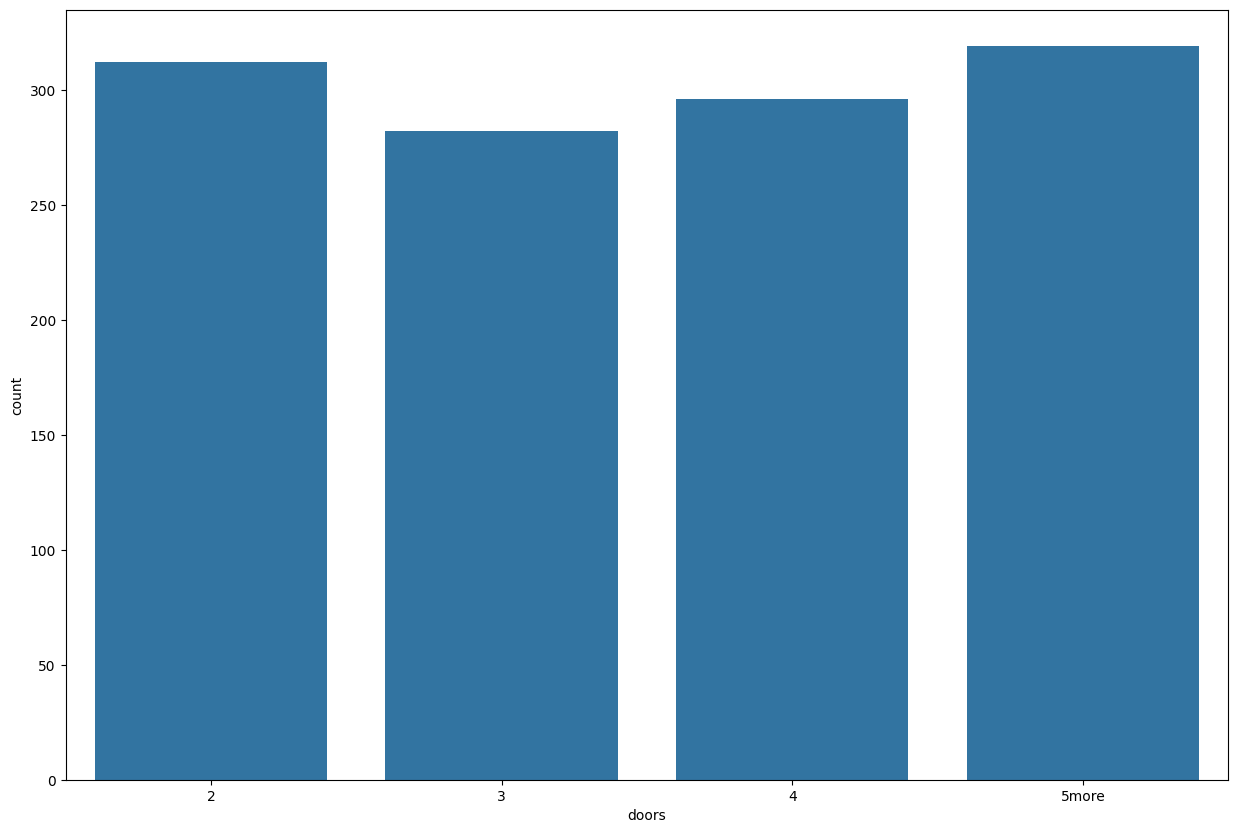

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='doors')

<Axes: xlabel='maint', ylabel='count'>

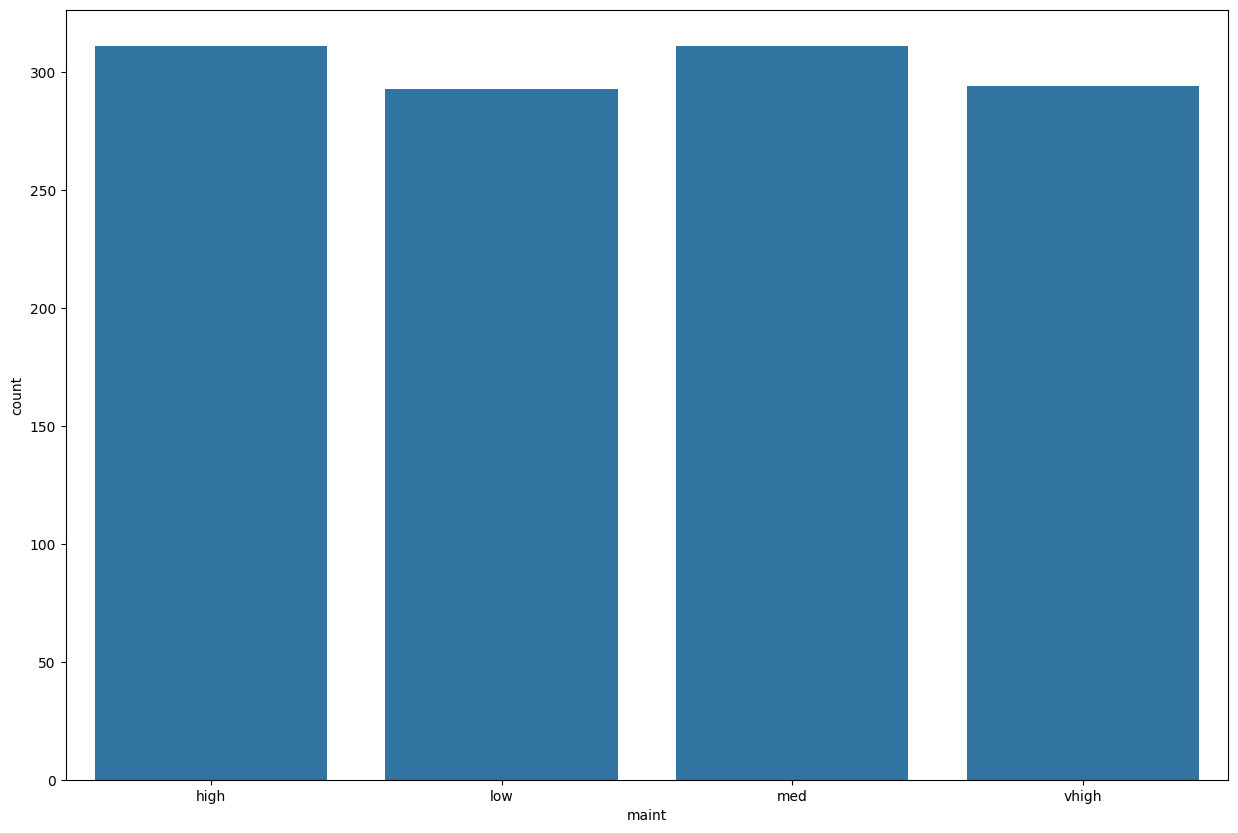

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='maint')

<Axes: xlabel='persons', ylabel='count'>

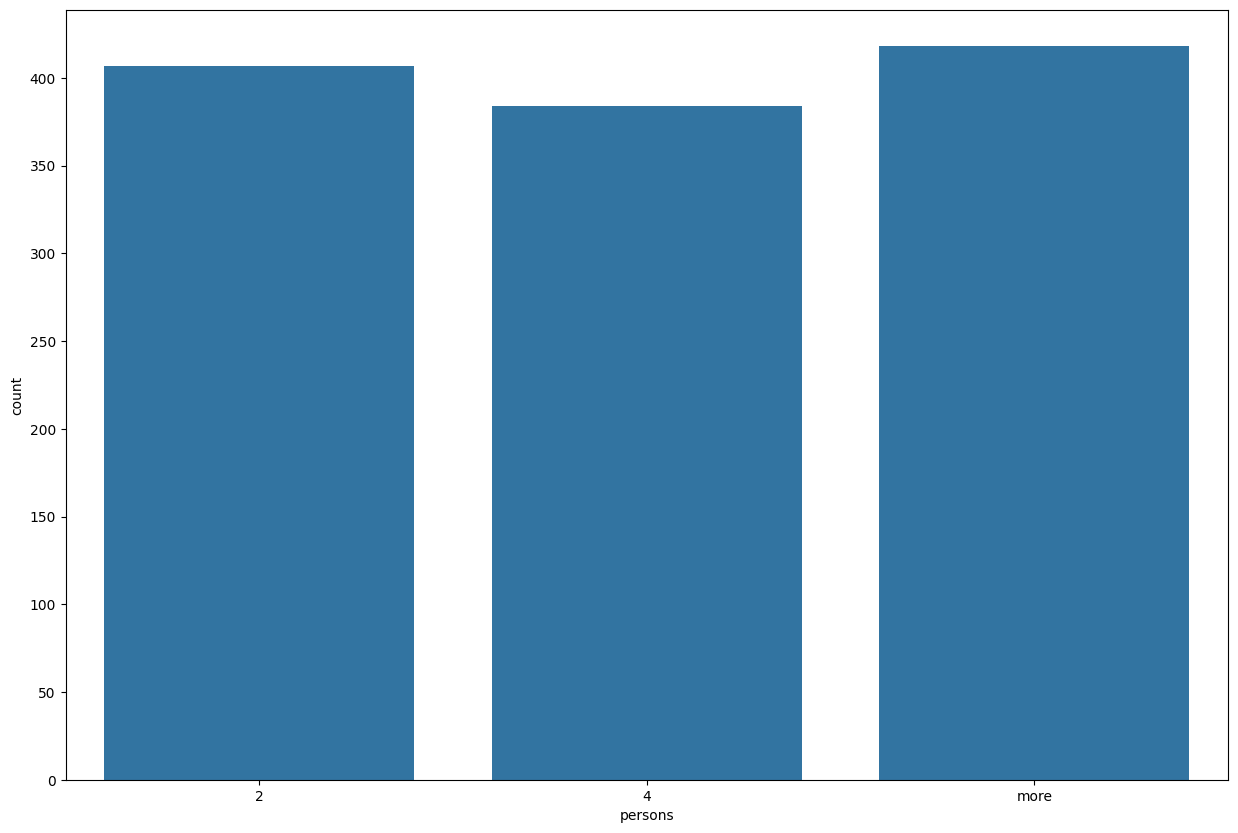

In [30]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='persons')

In [31]:
train_data['binaryClass'].value_counts()

binaryClass
P    849
N    360
Name: count, dtype: int64

<Axes: xlabel='binaryClass', ylabel='count'>

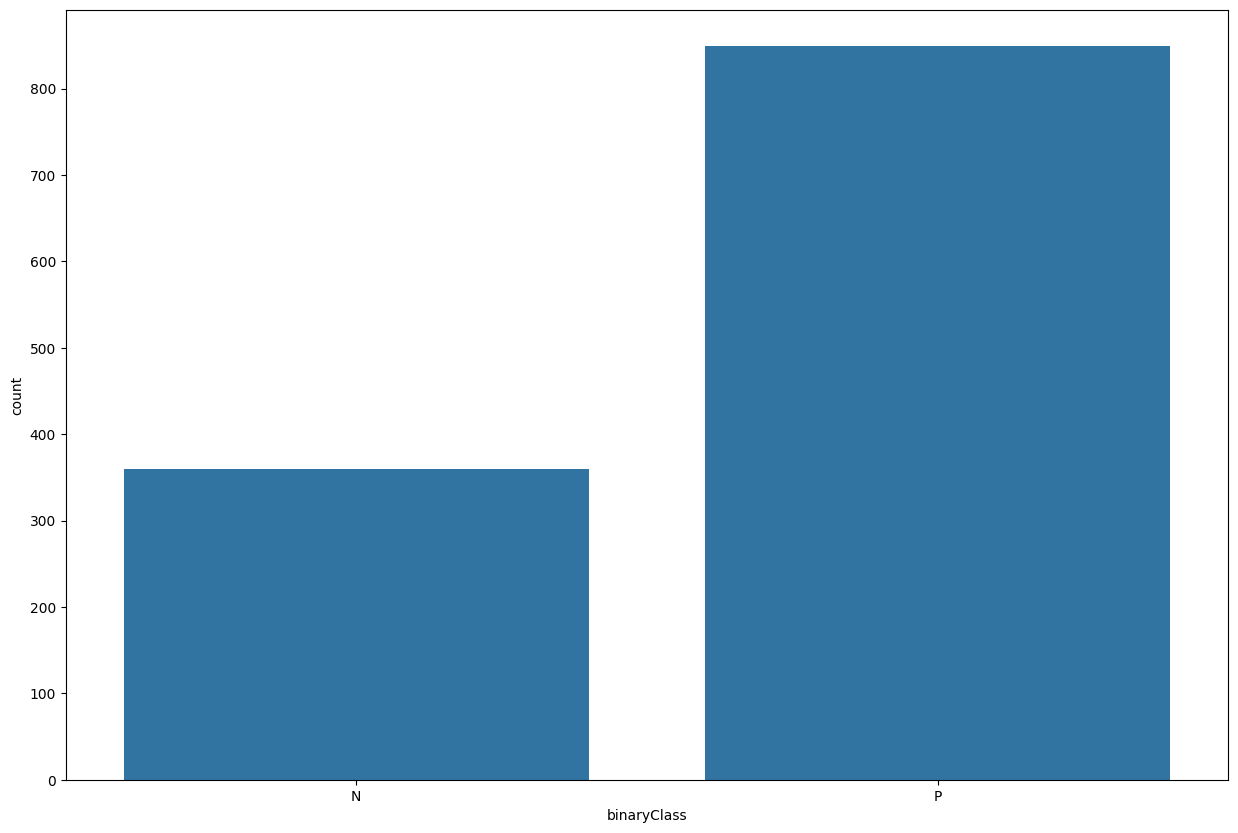

In [32]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='binaryClass')

<Axes: xlabel='doors', ylabel='count'>

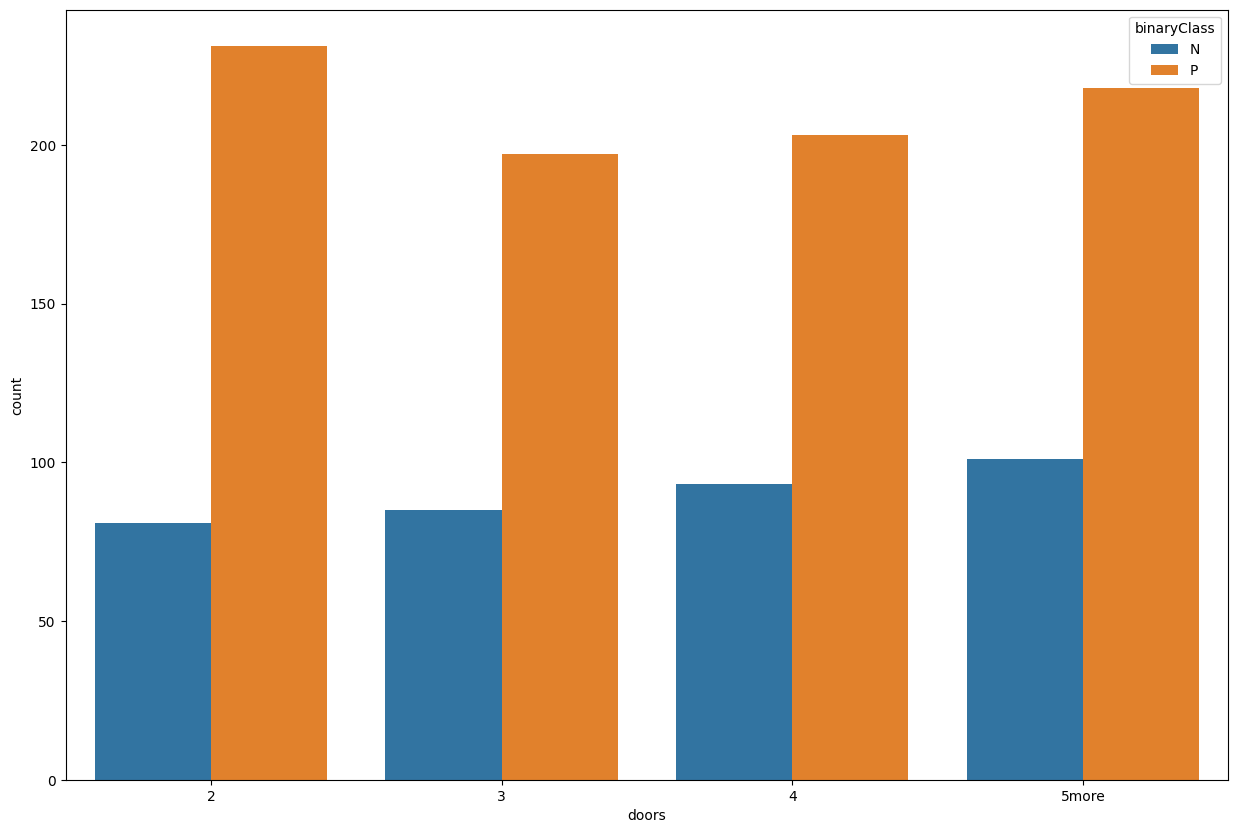

In [34]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,hue='binaryClass',x='doors')

In [35]:
car_train=train_data.drop('binaryClass',axis=1)
car_labels=train_data[['binaryClass']]

In [36]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe=Pipeline([('ord_enc',OrdinalEncoder())])
car_train_prepared=pipe.fit_transform(car_train)

In [37]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()
car_labels_prepared=label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
tree_clf=DecisionTreeClassifier()
tree_clf.fit(car_train_prepared,car_labels_prepared)

DecisionTreeClassifier()

In [48]:
from sklearn.metrics import accuracy_score
def accuracy(input_data,model,labels):
  preds=model.predict(input_data)
  acc=accuracy_score(labels,preds)
  return acc

In [53]:
from sklearn.metrics import confusion_matrix
def conf_matrix(input_data,model,labels):
  preds=model.predict(input_data)
  cm=confusion_matrix(labels,preds)
  return cm

In [50]:
accuracy(car_train_prepared,tree_clf,car_labels_prepared)

1.0

In [54]:
conf_matrix(car_train_prepared,tree_clf,car_labels_prepared)

array([[360,   0],
       [  0, 849]])